In [1]:
# In the root of the repo run "pip install --editable ."

# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src.data.import_data import import_df_from_zip_pkl
from src.data.make_dataset import *

import matplotlib.pyplot as plt

from rdtools.soiling import soiling_srr
from src.features.build_features import *
from src.models.detect_soiling import *

In [2]:
# Load the data
path_to_zip_pkl = '../data/raw/synthetic_soil.zip' 
df = import_df_from_zip_pkl(path_to_zip_pkl, index=10, verbose=True)
df = downsample_dataframe(df)

time for importing dataframe: 0.69 seconds


Add the actual cleaning event information to the dataframe

In [3]:
find_true_cleaning_events(df, inplace=True)
df.head()

,Power,Degradation,Soiling,Faults,soiling_loss,cleaning_event
datetime,,,,,,
2015-01-01 00:00:00-05:00,305.931250,0.99997,0.99625,1,-0.00375,0
2015-01-02 00:00:00-05:00,306.881250,0.99994,0.99437,1,-0.00188,0
2015-01-03 00:00:00-05:00,307.965972,0.99991,0.99249,1,-0.00188,0
2015-01-04 00:00:00-05:00,309.143750,0.99989,0.99061,1,-0.00188,0
2015-01-05 00:00:00-05:00,310.450694,0.99986,0.98874,1,-0.00187,0


/home/julius/Aug20_Epri/.env/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


<AxesSubplot:xlabel='datetime'>

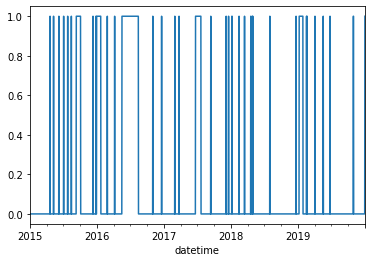

In [4]:
df.cleaning_event.plot()

In [5]:
_, cleaning_index, cleaning_heights = detect_cleaning_events_with_rollling_avg(df.Power)

/home/julius/Aug20_Epri/src/models/detect_soiling.py:56: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  rolling_avg_l = power_signal.rolling(window_size_l).apply(avg_function)
/home/julius/Aug20_Epri/src/models/detect_soiling.py:57: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  rolling_avg_r = power_signal.rolling(window_size_r).apply(avg_function)


In [6]:
soiling_profile = find_soiling_profile(df, cleaning_index, cleaning_heights)

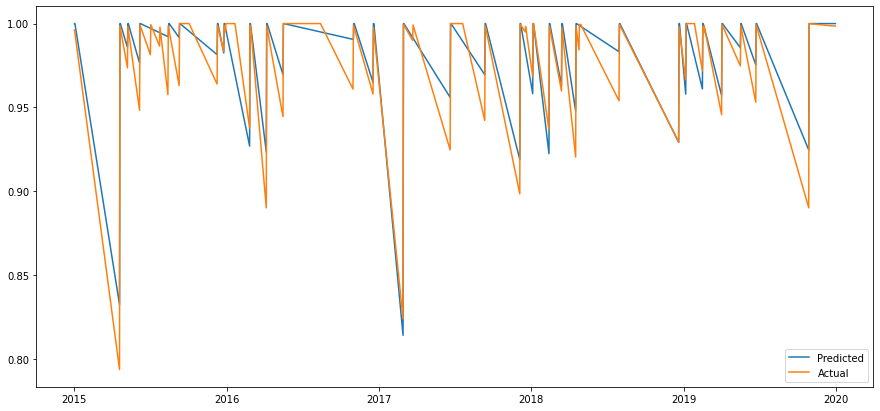

In [7]:
_, ax = plt.subplots(figsize=(15, 7))
ax.plot(soiling_profile .soiling_factor, label = "Predicted")
ax.plot(df.Soiling, label = "Actual")
ax.legend()